# PA 006

In [115]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


from sklearn import datasets as dt
from sklearn import cluster as c
from sklearn import metrics as m

# Blobs Dataset

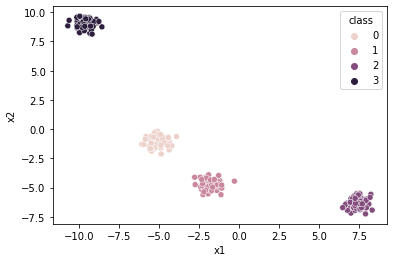

In [195]:
n = 2
X, y = dt.make_blobs (n_samples = 300,
                      n_features = n,
                      centers = 4,
                      cluster_std = 0.4,
                      random_state = 33)    

df = pd.DataFrame( X, columns = ['x' + str(i) for i in list(range(1 , n+1 ))])
df['class'] = y
sns.scatterplot (x='x1', y ='x2', hue='class', data=df);

In [196]:
df.head()

,x1,x2,class
0,-1.885974,-4.750467,1
1,-9.364100,9.051702,3
2,-2.108646,-4.154018,1
3,-4.377479,-1.760528,0
4,-9.408279,9.130998,3


# Moons Dataset

In [197]:
#n = 2
#X, y = dt.make_moons (n_samples = 300,
#                      noise = 0.01,
#                      random_state = 33)    
#
#df = pd.DataFrame( X, columns = ['x' + str(i) for i in list(range(1 , n+1 ))])
#df['class'] = y

In [198]:
#sns.scatterplot (x='x1', y ='x2', hue='class', data=df);

# Circles Dataset

In [211]:
X, y = dt.make_circles (n_samples = 300,
                      noise = 0.01,
                      factor = 0.02,
                      random_state = 33)    

df = pd.DataFrame( X, columns = ['x' + str(i) for i in list(range(1 , n+1 ))])
df['class'] = y

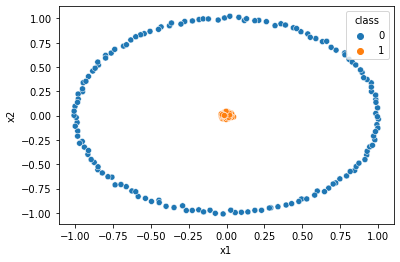

In [212]:
sns.scatterplot (x='x1', y ='x2', hue='class', data=df);

# Machine Learning

In [199]:
X = df.drop(columns = 'class', axis = 1)

silhouette_list = []
davies_bouldin_list = []
ch_list = []
clusters = [2, 3 , 4 ,5 ,6 ,7 ,8, 10, 11, 12, 13, 14, 15]

for k in clusters:
    # model definition
    kmeans_model = c.KMeans(n_clusters = k)

    # model training
    kmeans_model.fit( X )

    # model prediction
    labels = kmeans_model.predict (X)

    # metrics - silhouette
    sil = m.silhouette_score(X, labels)
    silhouette_list.append (sil)
    
    # metrics - davies-bouldin DB-Index
    db = m.davies_bouldin_score(X, labels)
    davies_bouldin_list.append (db)
    
    # metrics - davies-bouldin DB-Index
    db = m.calinski_harabasz_score(X, labels)
    ch_list.append (db)

# metrics

Text(0.5, 1.0, 'SS vs K')

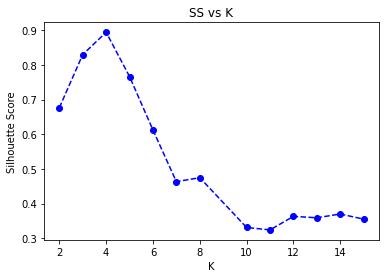

In [200]:
plt.plot(clusters, silhouette_list, linestyle = '--', marker = 'o', color = 'b' )
plt.xlabel ('K')
plt.ylabel('Silhouette Score')
plt.title ('SS vs K')
#plt.ylim([0,1]);

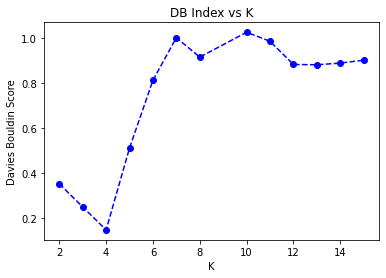

In [201]:
plt.plot(clusters, davies_bouldin_list, linestyle = '--', marker = 'o', color = 'b' )
plt.xlabel ('K')
plt.ylabel('Davies Bouldin Score')
plt.title ('DB Index vs K');

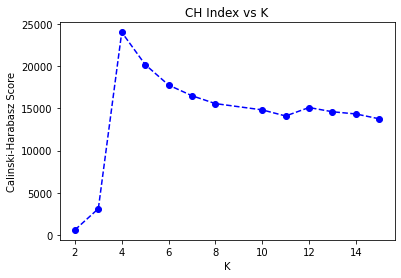

In [202]:
plt.plot(clusters, ch_list, linestyle = '--', marker = 'o', color = 'b' )
plt.xlabel ('K')
plt.ylabel('Calinski-Harabasz Score')
plt.title ('CH Index vs K');

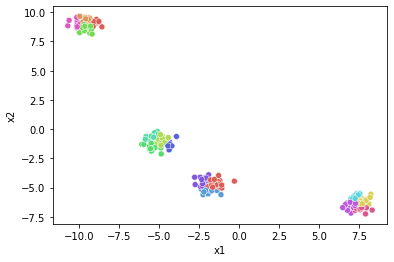

In [203]:
X['labels'] = labels
sns.scatterplot( x= 'x1', y = 'x2', hue = 'labels', palette = 'hls' , data = X, legend = False);

In [204]:
X.head()

,x1,x2,labels
0,-1.885974,-4.750467,10
1,-9.364100,9.051702,1
2,-2.108646,-4.154018,10
3,-4.377479,-1.760528,9
4,-9.408279,9.130998,1
